In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-65.68469943506484 -179.941961584811
43.93084516982515 33.182752613085796
61.44379467367085 61.63831195428668
60.87734359177199 132.1414902601618
-38.48606950813084 -46.0210848597558
5.1055562135818064 -22.89678737182956
-63.30529871845351 45.76568410144367
-86.32321009250299 -109.129146118094
67.96514876079402 -102.11472875335572
-82.32339675444415 -142.83591466480394
39.606423306093006 49.56210790315723
-44.11534561870024 58.65301655394484
13.631443472001635 -89.17764116553771
70.59609054307074 116.84887293000605
3.1320485934431304 -63.27363768058926
-15.895372882398817 -146.68537612675223
81.56115384075292 82.86526570212925
0.7668119812877023 99.39538087417475
-66.31681716838463 99.2987278441239
-44.67073895321258 166.9353961278556
75.47038868903147 95.15808673253184
-77.92515728481392 -88.95997280680561
24.095733077068786 -13.299784535532979
-29.07537209642596 64.25446198349255
42.39540783915052 -126.46441791494652
0.19596779680962584 -26.589050737074672
83.72511677807483 52.715679

-71.85165957301935 161.6970996211183
8.265533480967676 168.69116118091796
-75.0175251773205 98.62489980033774
-37.70984242240983 127.87381285981985
49.9893223847408 155.60647886437988
-32.37119300184199 -164.01891541243722
53.52373779011248 -82.5024576866985
85.71135436424166 103.274971230304
53.86101510905709 -168.68858623162797
-45.270862956179904 158.04697857108624
57.696373528520326 25.323998450286012
-30.409418790402654 35.645000531800775
-16.041480538008244 -70.4175061455546
27.657181948682975 84.82499720071013
74.97719490576503 -71.26607168390758
35.998735145990224 63.314212655716034
12.903665683622478 11.603555727365801
-54.601652229803996 168.766422564682
47.26852911372555 -57.766076659956084
31.56109007734068 48.054500050789045
-65.14976205268054 -104.57399588583107
68.08699720872221 -46.5163620988215
64.63176829124805 -143.01170503306548
18.379583545589654 33.51241103418997
-18.29842069381783 -179.6835697901204
12.09814629607797 -35.61527336269643
79.12951961196993 -38.34979

In [5]:
from citipy import citipy

In [6]:
cities = []

# Identify nearest cities for lats and longs
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # Add each unique city to list
    if city not in cities:
        cities.append(city)

len(cities)

610

In [7]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
city_data = []

# initialize URL w/ API key for OpenWeatherMap
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(
    "Beginning Data Retrieval\n",
    "-----------------------------"
)

# create counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60) # Only allowed 60 API calls/minute; sleep to prevent time-out errors.

    # Create endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers for each city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        weather = requests.get(city_url).json()
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]

        # Convert the date to ISO standard.
        date = datetime.utcfromtimestamp(weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append city info to city_data list.
        city_data.append({"City" : city.title(),
                          "Lat" : lat,
                          "Lng" : lng,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Clouds" : clouds,
                          "Wind" : wind,
                          "Country" : country,
                          "Date" : date})
    except:
        print(f"{city} not found. Skipping...")
        continue

# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | katsiveli
katsiveli not found. Skipping...
Processing Record 3 of Set 1 | ous
Processing Record 4 of Set 1 | amga
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | neftcala
Processing Record 12 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 13 of Set 1 | panchimalco
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | sibolga
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | at

Processing Record 34 of Set 4 | columbus
Processing Record 35 of Set 4 | bongandanga
Processing Record 36 of Set 4 | barrow
Processing Record 37 of Set 4 | pangnirtung
Processing Record 38 of Set 4 | kemijarvi
Processing Record 39 of Set 4 | cookeville
Processing Record 40 of Set 4 | ginda
Processing Record 41 of Set 4 | cavalcante
Processing Record 42 of Set 4 | fukue
Processing Record 43 of Set 4 | bluff
Processing Record 44 of Set 4 | tan an
Processing Record 45 of Set 4 | marcona
marcona not found. Skipping...
Processing Record 46 of Set 4 | ibirataia
Processing Record 47 of Set 4 | fallon
Processing Record 48 of Set 4 | tabou
Processing Record 49 of Set 4 | monticello
Processing Record 50 of Set 4 | a
a not found. Skipping...
Processing Record 1 of Set 5 | tawkar
tawkar not found. Skipping...
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | narrabri
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | severodvinsk
Processing Record 6 of Se

Processing Record 17 of Set 8 | tamala
Processing Record 18 of Set 8 | bagdarin
Processing Record 19 of Set 8 | zapadnaya dvina
Processing Record 20 of Set 8 | mattru
Processing Record 21 of Set 8 | shimoda
Processing Record 22 of Set 8 | moses lake
Processing Record 23 of Set 8 | murray bridge
Processing Record 24 of Set 8 | mendahara
mendahara not found. Skipping...
Processing Record 25 of Set 8 | sosnovo-ozerskoye
Processing Record 26 of Set 8 | broken hill
Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | kavaratti
Processing Record 29 of Set 8 | suba
Processing Record 30 of Set 8 | kuche
kuche not found. Skipping...
Processing Record 31 of Set 8 | goundam
Processing Record 32 of Set 8 | zaozerne
Processing Record 33 of Set 8 | sabaudia
Processing Record 34 of Set 8 | benjamin aceval
Processing Record 35 of Set 8 | bloomsburg
Processing Record 36 of Set 8 | kaura namoda
Processing Record 37 of Set 8 | banda aceh
Processing Record 38 of Set 8 | tiznit
Processi

Processing Record 1 of Set 12 | kargopol
Processing Record 2 of Set 12 | tiarei
Processing Record 3 of Set 12 | romitan
Processing Record 4 of Set 12 | baracoa
Processing Record 5 of Set 12 | husavik
Processing Record 6 of Set 12 | tonekabon
Processing Record 7 of Set 12 | kuala terengganu
Processing Record 8 of Set 12 | varhaug
Processing Record 9 of Set 12 | kununurra
Processing Record 10 of Set 12 | vestmanna
Processing Record 11 of Set 12 | ankara
Processing Record 12 of Set 12 | bilma
Processing Record 13 of Set 12 | sabha
Processing Record 14 of Set 12 | maldonado
Processing Record 15 of Set 12 | taksimo
Processing Record 16 of Set 12 | nuuk
Processing Record 17 of Set 12 | kurilsk
Processing Record 18 of Set 12 | broome
Processing Record 19 of Set 12 | papa
Processing Record 20 of Set 12 | karakol
Processing Record 21 of Set 12 | samandag
Processing Record 22 of Set 12 | poronaysk
Processing Record 23 of Set 12 | villa carlos paz
Processing Record 24 of Set 12 | hay river
Proces

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Vaini,-21.2000,-175.2000,71.76,88,40,8.05,TO,2022-07-22 17:22:23
1,Ous,60.9058,61.5186,56.16,57,14,6.04,RU,2022-07-22 17:22:24
2,Amga,60.8953,131.9608,66.42,81,100,2.46,RU,2022-07-22 17:22:24
3,Chuy,-33.6971,-53.4616,60.01,83,100,3.15,UY,2022-07-22 17:22:25
4,Bubaque,11.2833,-15.8333,77.36,90,100,19.77,GW,2022-07-22 17:22:25
5,East London,-33.0153,27.9116,63.54,67,0,5.75,ZA,2022-07-22 17:22:25
6,Punta Arenas,-53.1500,-70.9167,41.02,75,0,20.71,CL,2022-07-22 17:20:09
7,Thompson,55.7435,-97.8558,53.76,87,100,5.75,CA,2022-07-22 17:22:26
8,Mataura,-46.1927,168.8643,33.48,98,16,2.95,NZ,2022-07-22 17:22:26
9,Neftcala,39.3742,49.2472,79.27,67,0,9.60,AZ,2022-07-22 17:22:27


In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind"]]
city_data_df.rename(columns={"Clouds":"Cloudiness", "Wind":"Wind Speed"}, inplace=True)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-22 17:22:23,-21.2000,-175.2000,71.76,88,40,8.05
1,Ous,RU,2022-07-22 17:22:24,60.9058,61.5186,56.16,57,14,6.04
2,Amga,RU,2022-07-22 17:22:24,60.8953,131.9608,66.42,81,100,2.46
3,Chuy,UY,2022-07-22 17:22:25,-33.6971,-53.4616,60.01,83,100,3.15
4,Bubaque,GW,2022-07-22 17:22:25,11.2833,-15.8333,77.36,90,100,19.77


In [11]:
city_data_df.to_csv("./Weather-Data/cities.csv", index_label="City_ID")

In [12]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidities = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

In [13]:
import time
# Get today's date
today = time.strftime("%x")

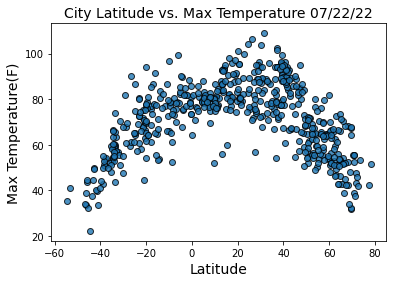

In [14]:
plt.scatter(lats, max_temps,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature(F)', fontsize=14)
plt.title('City Latitude vs. Max Temperature ' + today, fontsize=14)

plt.show()

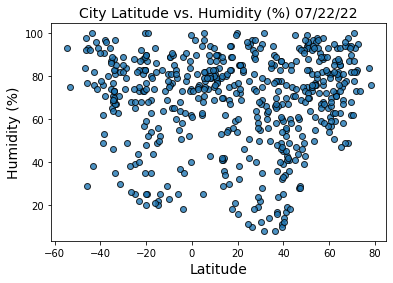

In [15]:
plt.scatter(lats, humidities,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs. Humidity (%) ' + today, fontsize=14)

plt.show()

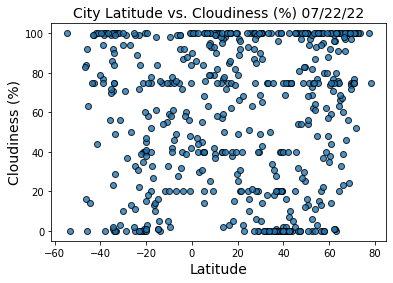

In [16]:
plt.scatter(lats, cloudiness,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title('City Latitude vs. Cloudiness (%) ' + today, fontsize=14)

plt.show()

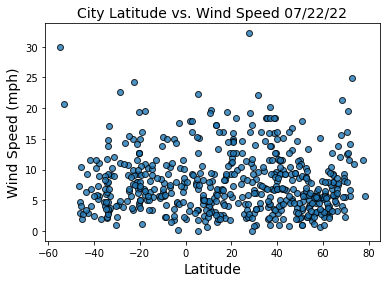

In [17]:
plt.scatter(lats, wind_speeds,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.title('City Latitude vs. Wind Speed ' + today, fontsize=14)

plt.show()

In [18]:
from scipy.stats import linregress

def plot_linear_regression(x_vals, y_vals, title, y_label, text_coordinates):
    # Run regression on hemisphere data
    (slope, intercept, r_val, p_val, std_err) = linregress(x_vals, y_vals)

    # Calculate regression line values
    regress_vals = x_vals * slope + intercept

    # Get regression equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot and plot regression line
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_vals, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title, fontsize=14)
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    plt.show()

In [19]:
# Create hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

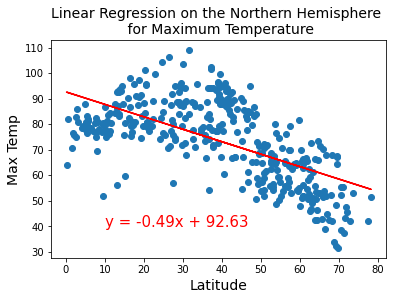

In [20]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (10,40))

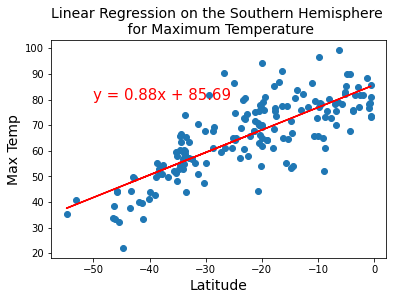

In [21]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-50, 80))

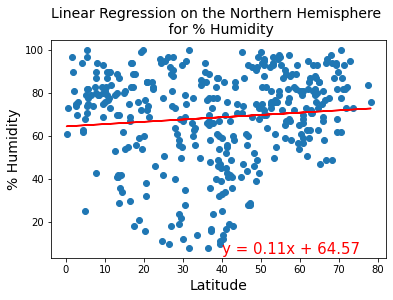

In [22]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity', (40, 5))

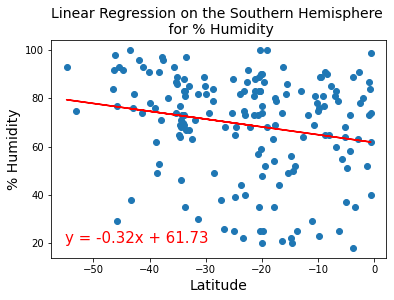

In [23]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity', (-55, 20))

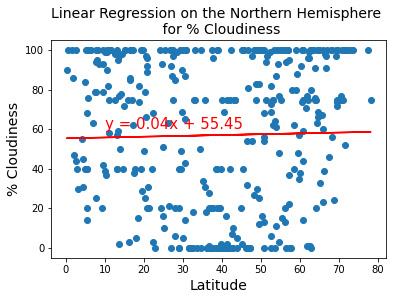

In [24]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (10, 60))

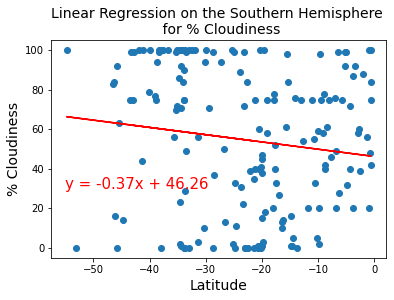

In [25]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (-55, 30))

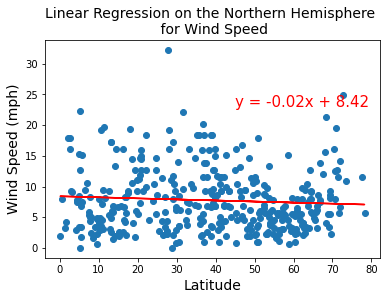

In [26]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (45, 23))

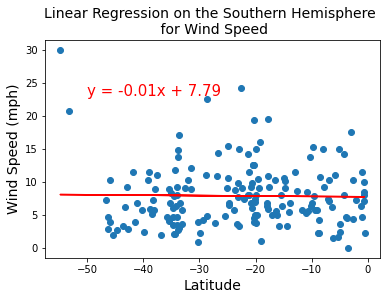

In [27]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (-50, 23))

In [28]:
import pandas as pd
import gmaps
import requests
from config import g_key

In [29]:
gmaps.configure(g_key)

In [39]:
# Assign locations to an array of latitude and longitude pairs
locations = city_data_df[['Lat','Lng']]

max_temp = city_data_df["Max Temp"]

# Initialize figure
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp,0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Assign locations to an array of latitude and longitude pairs
locations = city_data_df[['Lat','Lng']]

humidity = city_data_df["Humidity"]

# Initialize figure
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Assign locations to an array of latitude and longitude pairs
locations = city_data_df[['Lat','Lng']]

clouds = city_data_df["Cloudiness"]

# Initialize figure
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Assign locations to an array of latitude and longitude pairs
locations = city_data_df[['Lat','Lng']]

wind = city_data_df["Wind Speed"]

# Initialize figure
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Ask customer to add a min and max temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [46]:
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp),:]
preferred_cities_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Bubaque,GW,2022-07-22 17:22:25,11.2833,-15.8333,77.36,90,100,19.77
9,Neftcala,AZ,2022-07-22 17:22:27,39.3742,49.2472,79.27,67,0,9.60
10,Panchimalco,SV,2022-07-22 17:22:27,13.6128,-89.1800,83.21,87,77,1.41
12,Boa Vista,BR,2022-07-22 17:22:25,2.8197,-60.6733,85.98,70,40,9.22
13,Tautira,PF,2022-07-22 17:22:28,-17.7333,-149.1500,75.58,80,52,10.92
...,...,...,...,...,...,...,...,...,...
540,Kontagora,NG,2022-07-22 17:38:16,10.3999,5.4695,76.15,87,90,2.86
541,Le Vauclin,MQ,2022-07-22 17:38:16,14.5452,-60.8388,87.85,62,40,16.11
544,Porto Novo,BJ,2022-07-22 17:36:53,6.4965,2.6036,78.62,79,100,9.48
545,Williston,US,2022-07-22 17:38:18,48.1470,-103.6180,86.74,46,27,1.99


In [48]:
preferred_cities_df.count()

City          204
Country       204
Date          204
Lat           204
Lng           204
Max Temp      204
Humidity      204
Cloudiness    204
Wind Speed    204
dtype: int64

In [49]:
# Create a DataFrame to store hotel names.
hotel_df = preferred_cities_df[["City","Country","Max Temp","Lat","Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Bubaque,GW,77.36,11.2833,-15.8333,
9,Neftcala,AZ,79.27,39.3742,49.2472,
10,Panchimalco,SV,83.21,13.6128,-89.1800,
12,Boa Vista,BR,85.98,2.8197,-60.6733,
13,Tautira,PF,75.58,-17.7333,-149.1500,
15,Sibolga,ID,76.69,1.7427,98.7792,
22,Touros,BR,82.20,-5.1989,-35.4608,
25,Butaritari,KI,80.96,3.0707,172.7902,
27,San Andres,CO,84.22,12.5847,-81.7006,
32,Torbay,CA,79.88,47.6666,-52.7314,


In [52]:
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "radius" : 5000,
    "type" : "lodging",
    "key" : g_key
}

for index, row in hotel_df.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    
    hotels = requests.get(url, params=params).json()
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except IndexError:
        print("Hotel not found... skipping.")
    
hotel_df.head(10)

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Bubaque,GW,77.36,11.2833,-15.8333,"Casa Dora, Bubaque"
9,Neftcala,AZ,79.27,39.3742,49.2472,Otel restoran
10,Panchimalco,SV,83.21,13.6128,-89.1800,Ixmucané
12,Boa Vista,BR,85.98,2.8197,-60.6733,Aipana Plaza Hotel
13,Tautira,PF,75.58,-17.7333,-149.1500,Pension Oaoa
15,Sibolga,ID,76.69,1.7427,98.7792,Hotel Syariah CN Darussalam
22,Touros,BR,82.20,-5.1989,-35.4608,INN NEW HORIZON
25,Butaritari,KI,80.96,3.0707,172.7902,Isles Sunset Lodge
27,San Andres,CO,84.22,12.5847,-81.7006,Hotel Arena Blanca
32,Torbay,CA,79.88,47.6666,-52.7314,Gallows Cove


In [56]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
"""
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [57]:
# Assign locations to an array of latitude and longitude pairs
locations = hotel_df[['Lat','Lng']]

max_temp = hotel_df["Max Temp"]

# Initialize figure
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)

# Assign variables
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))